In [1]:
!pip install keras
!pip install contractions
!pip install emoji
!pip install nltk
!pip install stop_words


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32987 sha256=57f0c3d4bbea5450d457f6943620f5e7e83b53f567e03160878027f06057448d
  Sto

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import string
import nltk
import re

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from stop_words import get_stop_words
from nltk.corpus import stopwords
from collections import Counter
from contractions import fix
from nltk import ngrams
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
data = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1')

In [4]:
data

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

In [6]:
data

,sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
data.drop(['id', 'date', 'query', 'user'], axis=1, inplace=True)
data

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
from collections import Counter

## convert to 1 positif 0 for negatif
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 4 else 0)

In [9]:
data

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,1,Just woke up. Having no school is the best fee...
1599995,1,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,Happy 38th Birthday to my boo of alll time!!! ...


# Data Analysis

In [10]:
print("===================================")
print("the data length : ", data.shape[0], "\n")
print("the data number of columns : ", data.shape[1], "\n")

print("===================================")
print("data columns : ", data.columns, "\n")


print("===================================")
print("data informations : \n")
data.info()


print("===================================")
print("data description : ")
data.describe()

the data length :  1599999 

the data number of columns :  2 

data columns :  Index(['sentiment', 'text'], dtype='object') 

data informations : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   text       1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
data description : 


,sentiment
count,1599999.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,1.0
75%,1.0
max,1.0


In [11]:
# 1. Basic info
print("Dataset shape:", data.shape)
print("Sample tweets:")
print(data[['text', 'sentiment']].sample(5))

Dataset shape: (1599999, 2)
Sample tweets:
                                                      text  sentiment
434196   Trying to play Fable, but my computer hates me...          0
1076897  @jimmyfallon When is Leno's last show? Hey... ...          1
878336   @natalietran We believe you  (and my we I mean...          1
946534   so TIRED! came back from the Victoria Cup tour...          1
76823    It's been days since I've been able to talk to...          0


In [12]:
# 2. Distribution of sentiment labels
label_counts = data['sentiment'].value_counts()
print("\nSentiment distribution:\n", label_counts)


Sentiment distribution:
 sentiment
1    800000
0    799999
Name: count, dtype: int64


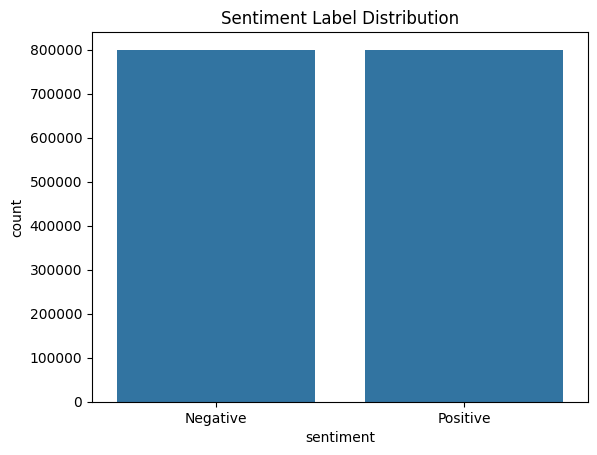

In [13]:
# Plot sentiment distribution
sns.countplot(x='sentiment', data=data)
plt.xticks([0,1], ['Negative', 'Positive'])
plt.title('Sentiment Label Distribution')
plt.show()

In [14]:
# 3. Text length analysis
data['text_length'] = data['text'].apply(len)
print("\nText length statistics:")
print(data['text_length'].describe())


Text length statistics:
count    1.599999e+06
mean     7.409009e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_length, dtype: float64


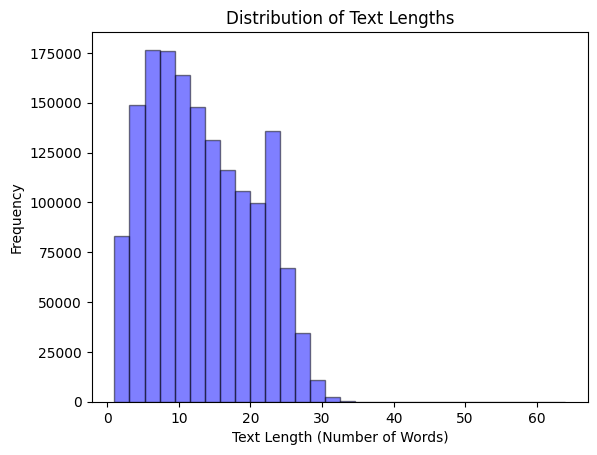

In [15]:
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

plt.hist(data['text_length'], bins=30, color='blue', edgecolor='black', alpha=0.5)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_10/3104907527.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_text_length.index, y=average_text_length.values, palette=['red', 'green'])


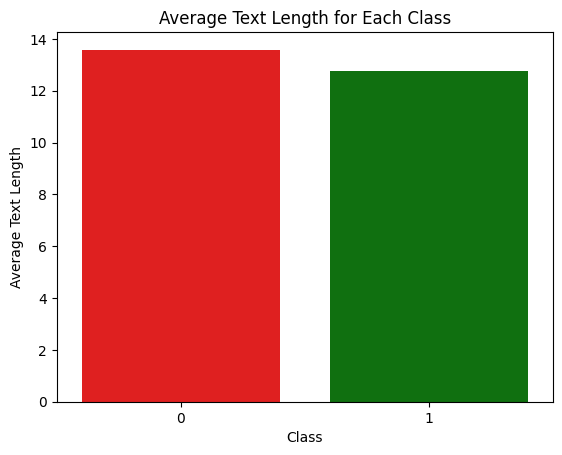

In [16]:
# 4. Average text length by sentiment
average_text_length = data.groupby('sentiment')['text_length'].mean()

sns.barplot(x=average_text_length.index, y=average_text_length.values, palette=['red', 'green'])
plt.title('Average Text Length for Each Class')
plt.xlabel('Class')
plt.ylabel('Average Text Length')
plt.show()

/tmp/ipykernel_10/996268126.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='count', y='word', data=df_pos, palette='Greens_d')
/tmp/ipykernel_10/996268126.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='count', y='word', data=df_neg, palette='Reds_d')


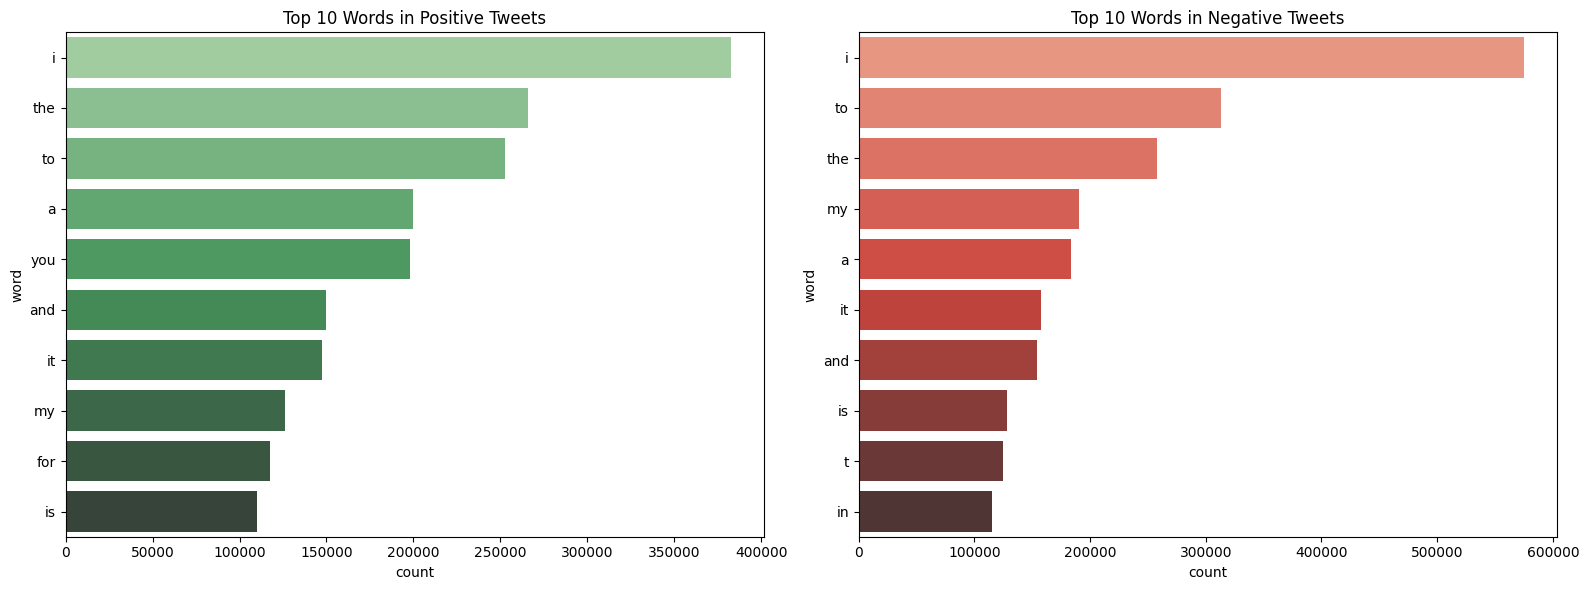

In [17]:
# Function to get top words
def get_top_words(texts, top_n=10):
    words = ' '.join(texts).lower()
    words = re.findall(r'\b\w+\b', words)
    return Counter(words).most_common(top_n)

# Get top words for each sentiment
top_pos = get_top_words(data[data['sentiment'] == 1]['text'])
top_neg = get_top_words(data[data['sentiment'] == 0]['text'])

# Convert to DataFrames for plotting
df_pos = pd.DataFrame(top_pos, columns=['word', 'count'])
df_neg = pd.DataFrame(top_neg, columns=['word', 'count'])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive tweets
sns.barplot(ax=axes[0], x='count', y='word', data=df_pos, palette='Greens_d')
axes[0].set_title("Top 10 Words in Positive Tweets")

# Negative tweets
sns.barplot(ax=axes[1], x='count', y='word', data=df_neg, palette='Reds_d')
axes[1].set_title("Top 10 Words in Negative Tweets")

plt.tight_layout()
plt.show()


# Data Cleaning

## 1- Noise cleaning
in this section we will be :

- Removing HTML tags
- Removing Urls
- Removing Email Addresses
- Removing Hashtags
- Removing Mentions (@username)

In [18]:
def remove_html_tags(text):
  """
    removes html tags.
  """
  cleaned_text = re.sub(r'<.*?>', ' ', text)
  return cleaned_text

In [19]:
def remove_urls(text):
    """
      removes urls.
    """
    cleaned_text = re.sub(r'\b(?:http|https|www)\S+', ' ', text, flags=re.IGNORECASE)
    return cleaned_text

In [20]:
def remove_emails(text):
    """
      removes emails.
    """
    cleaned_text = re.sub(r'\S+@\S+', ' ', text)
    return cleaned_text


In [21]:
def remove_mentions(text):
    """
      removes mentions.
    """
    cleaned_text = re.sub(r'@\w+', ' ', text)
    return cleaned_text

In [22]:
def remove_hashtags(text):
    """
      removes hashtags.
    """
    cleaned_text = re.sub(r'#\w+', ' ', text)
    return cleaned_text

In [31]:
import emoji
import re

def domijize_text(text):

    def add_spaces_around_emoji(s):
        return ''.join(f' {char} ' if char in emoji.EMOJI_DATA else char for char in s)
    
    spaced_text = add_spaces_around_emoji(text)
    
    cleaned_text = emoji.demojize(spaced_text)
    cleaned_text = re.sub(r':', '', cleaned_text)
    cleaned_text = cleaned_text.replace('_', ' ')
    return cleaned_text

text = "I feel like a demon 😈 after last night's party 🥳, totally with a hangover 🤕 and so tired 😴!"
print(demojize_text_with_spaces(text))

I feel like a demon smiling face with horns after last night's party partying face , totally with a hangover face with head-bandage and so tired sleeping face !


In [32]:
def noise_cleaning(text):
  """
    performs noise cleaning on text.
  """
  cleaned_text = remove_html_tags(text)
  cleaned_text = remove_urls(cleaned_text)
  cleaned_text = remove_emails(cleaned_text)
  cleaned_text = remove_mentions(cleaned_text)
  cleaned_text = remove_hashtags(cleaned_text)
  cleaned_text = domijize_text(cleaned_text)

  return cleaned_text

In [33]:
from joblib import Parallel, delayed
from tqdm import tqdm
import os
import time

n_cores = os.cpu_count()

print("CPU cores (logical):", n_cores)

start_time = time.time()

data['cleaned_text'] = Parallel(n_jobs=96)(
    delayed(noise_cleaning)(text) for text in tqdm(data['text'], desc="Cleaning texts")
)

end_time = time.time()
print(f"Time taken to clean the text: {end_time - start_time:.2f} seconds")

CPU cores (logical): 96


Cleaning texts: 100%|██████████| 1599999/1599999 [02:03<00:00, 12986.12it/s]


Time taken to clean the text: 124.96 seconds


## 2-Standardization

- Normalizing ordinals (1st -> 1, 21th -> 21, etc...)
- Expanding Contractions (don't -> do not, isn't -> is not)

Normalizing ordinals will lead to better cleaning because in case we deleted number alone (th, st, nd) will stay in the text and won't be deleted.

Same for Contractions should be expended because if we delelte punctuation words like "isn't" will become "isn t" that won't be removed in the stop words treatment.

In [34]:
def expand_contractions(text):
    """
      expands contractions in the text (don't -> do not)
    """
    return fix(text)

In [35]:
def standardize_ordinal(text):
    """
      standardize ordinal numbers in text.
      from 12th -> 12, 1st -> 1 , etc...
    """
    cleaned_text = re.sub(r'(\d+)(st|nd|rd|th)\b', r'\1', text)
    return cleaned_text
     

In [36]:
def standardization(text):
  """
    performs standardization on text.
  """
  cleaned_text = standardize_ordinal(text)
  cleaned_text = expand_contractions(cleaned_text)

  return cleaned_text

In [37]:
from joblib import Parallel, delayed
from tqdm import tqdm
import os
import time

n_cores = os.cpu_count()

print("CPU cores (logical):", n_cores)

start_time = time.time()

data['cleaned_text'] = Parallel(n_jobs=96)(
    delayed(standardization)(text) for text in tqdm(data['cleaned_text'], desc="Cleaning texts")
)

end_time = time.time()
print(f"Time taken to clean the text: {end_time - start_time:.2f} seconds")

CPU cores (logical): 96


Cleaning texts: 100%|██████████| 1599999/1599999 [00:12<00:00, 125240.91it/s]


Time taken to clean the text: 13.78 seconds


## 3-Basic text cleaning
in this section we will be :

- Removing Numbers
- Removing Extra Whitespaces And Newlines
- Lowercasing
- delete non english caracters
- delete punctuation

In [38]:
def remove_numbers(text):
  """
    removes numbers.
  """
  cleaned_text = re.sub(r'\d+', ' ', text)
  return cleaned_text

In [39]:
def remove_newline(text):
  """
    removes newline characters.
  """
  cleaned_text = re.sub(r'\n+', ' ', text)
  return cleaned_text

In [40]:
def remove_duplicated_spaces(text):
  """
    removes duplicated spaces.
  """
  cleaned_text = re.sub(r'\s+',' ', text)
  cleaned_text = cleaned_text.strip()

  return cleaned_text

In [41]:
def remove_punctuation(text):
    """
    Removes all punctuation from the input text.
    """
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

text = "hello everyone my name is amy!! #5 ^* ne, hoyaa , idkk. ... but kinda. CoooL"
cleaned_text = remove_punctuation(text)
print(cleaned_text)

hello everyone my name is amy 5  ne hoyaa  idkk  but kinda CoooL


In [42]:
def remove_time_formats(text):
  """
    removes time formats am and pm only.
  """
  cleaned_text = re.sub(r'\s(am|pm)\b', '', text)
  return cleaned_text

In [43]:
def remove_non_english_chars(text):
    """
    Removes all characters that are not English letters or spaces.
    """
    return re.sub(r'[^a-zA-Z\s]', '', text)

In [44]:
def remove_single_chars_from_text(text):
    tokens = text.split()
    filtered_tokens = [t for t in tokens if len(t) > 1]
    return ' '.join(filtered_tokens)

In [46]:
def basic_cleaning(text):
    """
    perform basic cleaning 
    """
    cleaned_text = remove_punctuation(text)
    cleaned_text = remove_numbers(cleaned_text)
    cleaned_text = remove_single_chars_from_text(cleaned_text)
    cleaned_text = remove_newline(cleaned_text)
    cleaned_text = remove_time_formats(cleaned_text)
    cleaned_text = remove_non_english_chars(cleaned_text)
    cleaned_text = remove_duplicated_spaces(cleaned_text)

    return cleaned_text

In [47]:
from joblib import Parallel, delayed
from tqdm import tqdm
import os
import time

n_cores = os.cpu_count()

print("CPU cores (logical):", n_cores)

start_time = time.time()

data['cleaned_text'] = Parallel(n_jobs=96)(
    delayed(basic_cleaning)(text) for text in tqdm(data['cleaned_text'], desc="Cleaning texts")
)

end_time = time.time()
print(f"Time taken to clean the text: {end_time - start_time:.2f} seconds")

CPU cores (logical): 96


Cleaning texts: 100%|██████████| 1599999/1599999 [00:13<00:00, 118174.17it/s]


Time taken to clean the text: 14.69 seconds


## 4- Tokenization & Stop Words Removal & Lemmatization

### 4.1- Tokenization

In [48]:
def tokenize(text):
  """
    tokenizes text.
  """
  tokens = word_tokenize(text)
  return tokens

### 4.2- Stop Words

first we will create a set of stop words by combining stop words from nltk, stop_words and sp

In [49]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
all_stopwords = stop_words + nltk_words
all_stopwords= set(all_stopwords)

preserve_words = {'not', 'no', 'none', 'very', 'even', 'but', 'however','although'}

all_stopwords.difference_update(preserve_words)

all_stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'by',
 'can',
 "can't",
 'cannot',
 'could',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 "let's",
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'nor',
 'now',
 '

In [50]:
def remove_stop_words(tokens):
  """
    removes stop words from tokens.
  """
  cleaned_tokens = [token for token in tokens if token not in all_stopwords]
  return cleaned_tokens

### 4.3- Lemmatization

In [51]:
def lemmatize_text(tokens):
  """
    lemmatizes tokens.
  """
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  cleaned_text = ' '.join(lemmatized_tokens)
  return cleaned_text

### 4.4- Final Function for Tokenization, Stop Word and Lemmatization


In [52]:
def text_tok_stop_lem(text):
  """
    performs tokenization, stop word removal and lemmatization on text.
  """
  tokens = tokenize(text)
  cleaned_tokens = remove_stop_words(tokens)
  cleaned_text = lemmatize_text(cleaned_tokens)

  return cleaned_text

In [53]:
from joblib import Parallel, delayed
from tqdm import tqdm
import os
import time

n_cores = os.cpu_count()

print("CPU cores (logical):", n_cores)

start_time = time.time()

data['cleaned_text'] = Parallel(n_jobs=96)(
    delayed(text_tok_stop_lem)(text) for text in tqdm(data['cleaned_text'], desc="Cleaning texts")
)

end_time = time.time()
print(f"Time taken to clean the text: {end_time - start_time:.2f} seconds")

CPU cores (logical): 96


Cleaning texts:   0%|          | 192/1599999 [00:09<22:51:46, 19.44it/s]/usr/local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Cleaning texts: 100%|██████████| 1599999/1599999 [01:16<00:00, 21049.57it/s] 


Time taken to clean the text: 77.21 seconds


## 5- Final Data

In [54]:
data.head()


,sentiment,text,text_length,cleaned_text
0,0,is upset that he can't update his Facebook by ...,21,upset not update Facebook texting might cry re...
1,0,@Kenichan I dived many times for the ball. Man...,18,dived many time ball Managed save The rest go ...
2,0,my whole body feels itchy and like its on fire,10,whole body feel itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",21,no not behaving mad not see
4,0,@Kwesidei not the whole crew,5,not whole crew


In [55]:
data.tail()

,sentiment,text,text_length,cleaned_text
1599994,1,Just woke up. Having no school is the best fee...,11,Just woke Having no school best feeling ever
1599995,1,TheWDB.com - Very cool to hear old Walt interv...,11,TheWDBcom Very cool hear old Walt interview
1599996,1,Are you ready for your MoJo Makeover? Ask me f...,11,Are ready MoJo Makeover Ask detail
1599997,1,Happy 38th Birthday to my boo of alll time!!! ...,12,Happy Birthday boo alll time Tupac Amaru Shakur
1599998,1,happy #charitytuesday @theNSPCC @SparksCharity...,5,happy


In [56]:
data_arranged = data[["cleaned_text","text_length","sentiment","text"]]
data_arranged.head()

,cleaned_text,text_length,sentiment,text
0,upset not update Facebook texting might cry re...,21,0,is upset that he can't update his Facebook by ...
1,dived many time ball Managed save The rest go ...,18,0,@Kenichan I dived many times for the ball. Man...
2,whole body feel itchy like fire,10,0,my whole body feels itchy and like its on fire
3,no not behaving mad not see,21,0,"@nationwideclass no, it's not behaving at all...."
4,not whole crew,5,0,@Kwesidei not the whole crew


In [57]:
data_arranged.drop(columns=["text"], inplace=True)
data_arranged.rename(columns={"cleaned_text": "text"}, inplace=True)
print(data_arranged.shape)

/tmp/ipykernel_10/1682538449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arranged.drop(columns=["text"], inplace=True)
/tmp/ipykernel_10/1682538449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arranged.rename(columns={"cleaned_text": "text"}, inplace=True)


(1599999, 3)


In [58]:
data_arranged.head()

,text,text_length,sentiment
0,upset not update Facebook texting might cry re...,21,0
1,dived many time ball Managed save The rest go ...,18,0
2,whole body feel itchy like fire,10,0
3,no not behaving mad not see,21,0
4,not whole crew,5,0


In [62]:
print("Null values:", data_arranged['text'].isnull().sum())

num_duplicates = data_arranged.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

Null values: 0

Number of duplicate rows: 78360


In [63]:
data_arranged = data_arranged.drop_duplicates(subset=['text'])
data_arranged.dropna(subset=['text'])

In [67]:
data_arranged.to_csv('cleaned_data.csv', index=False)